In [1]:
from idstools import wrapper, _config
config = _config.load_config('../config/idstools/BikeRentalDaily_config.yml')
w = wrapper.Wrapper(config=config)
w.run()

2024-02-16 14:01:46,540 [wrapper] [INFO] - Instantiating environments from configuration.
2024-02-16 14:01:46,573 [wrapper] [DEBUG] - Processing environment: DEFAULT
2024-02-16 14:01:46,573 [wrapper] [DEBUG] - Processing environment: TASK1
2024-02-16 14:01:46,574 [wrapper] [DEBUG] - Configured Target for module _objects in environment TASK1
2024-02-16 14:01:46,574 [wrapper] [DEBUG] - Configured DataPreparation for module data_preparation in environment TASK1
2024-02-16 14:01:46,574 [wrapper] [DEBUG] - Configured ModelOptimization for module model_optimization in environment TASK1
2024-02-16 14:01:46,575 [wrapper] [DEBUG] - Processing environment: TASK2
2024-02-16 14:01:46,576 [wrapper] [DEBUG] - Configured Target for module _objects in environment TASK2
2024-02-16 14:01:46,576 [wrapper] [DEBUG] - Configured DataPreparation for module data_preparation in environment TASK2
2024-02-16 14:01:46,577 [wrapper] [DEBUG] - Configured DataExplorer for module data_explorer in environment TASK2
20

# --------------------------------------------

In [2]:
from idstools import _config, _objects, data_preparation, model_optimization

In [3]:
config = _config.load_config('../config/idstools/BikeRentalDaily_config.yml')

In [4]:
data = _objects.Target(**config['task1']['_objects']['Target'])

2024-02-16 14:01:47,785 [_objects] [INFO] - Initializing TargetData object.
2024-02-16 14:01:47,787 [_helpers] [INFO] - Reading data from:
/home/davidrmn/Studies/introduction-data-science/data/BikeRentalDaily_train.csv
2024-02-16 14:01:47,790 [_objects] [INFO] - Using label: cnt
2024-02-16 14:01:47,790 [_objects] [INFO] - Using index: instant
2024-02-16 14:01:47,790 [_objects] [INFO] - Using features: ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
2024-02-16 14:01:47,791 [_objects] [INFO] - Output path not provided.
Using default output path: /home/davidrmn/Studies/introduction-data-science/results
2024-02-16 14:01:47,791 [_objects] [INFO] - No environment name provided.
Using default environment name: SELF_EXECUTED


In [5]:
preparator = data_preparation.DataPreparation(data, pipeline=config['task1']['data_preparation']['DataPreparation']['pipeline'])

2024-02-16 14:01:47,798 [data_preparation] [INFO] - Initializing DataExplorer
2024-02-16 14:01:47,800 [data_preparation] [INFO] - Data loaded from /home/davidrmn/Studies/introduction-data-science/data/BikeRentalDaily_train.csv.
2024-02-16 14:01:47,801 [data_preparation] [INFO] - Pipeline configuration:
_CustomTransformer:
- func: target_to_datetime
  module: idstools._transformer
  config:
    target: dteday
    format: '%d.%m.%Y'
_NaNDropper:
- target: hum
- target: season



In [6]:
preparator.run()

2024-02-16 14:01:47,807 [data_preparation] [INFO] - Pipeline created.
2024-02-16 14:01:47,810 [_transformer] [INFO] - Converting target column 'dteday' to datetime.
2024-02-16 14:01:47,813 [data_preparation] [INFO] - Pipeline step _CustomTransformer has been processed.
2024-02-16 14:01:47,816 [data_preparation] [INFO] - Pipeline step _NaNDropper has been processed.
2024-02-16 14:01:47,819 [_helpers] [INFO] - Writing data to:
/home/davidrmn/Studies/introduction-data-science/results/SELF_EXECUTED_BikeRentalDaily_train_processed.csv
2024-02-16 14:01:47,823 [data_preparation] [INFO] - Processed data written to /home/davidrmn/Studies/introduction-data-science/results/SELF_EXECUTED_BikeRentalDaily_train_processed.csv.


In [7]:
preparator._processed_data.describe().T

,count,mean,min,25%,50%,75%,max,std
dteday,506,2011-12-27 23:17:18.735177984,2011-01-02 00:00:00,2011-07-01 18:00:00,2011-12-28 12:00:00,2012-06-18 18:00:00,2012-12-31 00:00:00,NaN
season,506.00,2.44,1.00,1.00,2.00,3.00,4.00,1.10
yr,506.00,0.50,0.00,0.00,0.00,1.00,1.00,0.50
mnth,506.00,6.44,1.00,4.00,6.00,9.00,12.00,3.41
holiday,506.00,0.03,0.00,0.00,0.00,0.00,1.00,0.18
weekday,506.00,2.89,-1.00,1.00,3.00,5.00,6.00,2.08
workingday,506.00,0.68,0.00,0.00,1.00,1.00,1.00,0.47
weathersit,506.00,1.40,1.00,1.00,1.00,2.00,3.00,0.55
temp,506.00,19.91,2.37,13.38,20.28,26.23,34.47,7.29
atemp,506.00,0.48,0.08,0.33,0.49,0.61,0.83,0.16


In [8]:
optimizer = model_optimization.ModelOptimization(data)

2024-02-16 14:01:47,863 [model_optimization] [INFO] - Initializing ModelOptimization
2024-02-16 14:01:47,864 [model_optimization] [INFO] - Data loaded from /home/davidrmn/Studies/introduction-data-science/data/BikeRentalDaily_train.csv.
2024-02-16 14:01:47,865 [model_optimization] [INFO] - Please provide a pipeline configuration.
2024-02-16 14:01:47,865 [model_optimization] [INFO] - Processed data loaded from /home/davidrmn/Studies/introduction-data-science/data/BikeRentalDaily_train.csv.


In [9]:
optimizer.train_test_split()

2024-02-16 14:01:47,871 [model_optimization] [INFO] - Processed data loaded from /home/davidrmn/Studies/introduction-data-science/data/BikeRentalDaily_train.csv.
2024-02-16 14:01:47,871 [model_optimization] [INFO] - Running train_test_split
2024-02-16 14:01:47,874 [model_optimization] [INFO] - train_test_split completed successfully


In [10]:
optimizer.linear_regression()

2024-02-16 14:01:47,880 [model_optimization] [INFO] - Processed data loaded from /home/davidrmn/Studies/introduction-data-science/data/BikeRentalDaily_train.csv.
2024-02-16 14:01:47,881 [model_optimization] [INFO] - Running linear_regression
2024-02-16 14:01:47,884 [model_optimization] [INFO] - linear_regression completed successfully


In [11]:
optimizer.validation()

2024-02-16 14:01:47,889 [model_optimization] [INFO] - Processed data loaded from /home/davidrmn/Studies/introduction-data-science/data/BikeRentalDaily_train.csv.
2024-02-16 14:01:47,890 [model_optimization] [INFO] - Running validation
2024-02-16 14:01:47,890 [model_optimization] [INFO] - Validation for linear_regression
2024-02-16 14:01:47,892 [model_optimization] [INFO] - Prediction for linear_regression completed successfully
2024-02-16 14:01:47,894 [model_optimization] [INFO] - R2 score for linear_regression: 0.2
2024-02-16 14:01:47,894 [model_optimization] [INFO] - Adjusted R2 score for linear_regression: 0.1022222222222221
2024-02-16 14:01:47,895 [model_optimization] [INFO] - Mean Absolute Error for linear_regression: 1337.48
2024-02-16 14:01:47,895 [model_optimization] [INFO] - Validation completed successfully


In [12]:
optimizer.residual_analysis()

2024-02-16 14:01:47,901 [model_optimization] [INFO] - Processed data loaded from /home/davidrmn/Studies/introduction-data-science/data/BikeRentalDaily_train.csv.
2024-02-16 14:01:47,902 [model_optimization] [INFO] - Running residual_analysis
2024-02-16 14:01:47,902 [model_optimization] [INFO] - Residual analysis for linear_regression
2024-02-16 14:01:47,904 [model_optimization] [INFO] - Residuals for linear_regression completed successfully
2024-02-16 14:01:47,904 [model_optimization] [INFO] - Residual analysis for linear_regression completed successfully
2024-02-16 14:01:47,905 [model_optimization] [INFO] - Residual analysis completed successfully


2024-02-16 14:01:47,910 [model_optimization] [INFO] - Processed data loaded from /home/davidrmn/Studies/introduction-data-science/data/BikeRentalDaily_train.csv.
2024-02-16 14:01:47,911 [model_optimization] [INFO] - Running plot_residuals
2024-02-16 14:01:47,912 [model_optimization] [INFO] - Plotting residuals for linear_regression
2024-02-16 14:01:47,930 [model_optimization] [INFO] - Residuals for linear_regression plotted successfully
2024-02-16 14:01:47,930 [model_optimization] [INFO] - Plot_residuals completed successfully


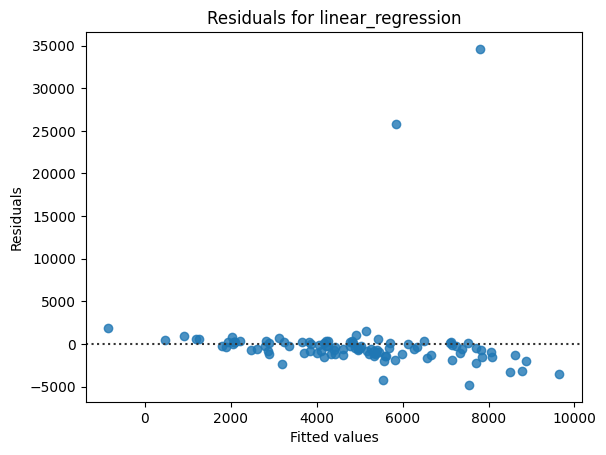

In [13]:
optimizer.plot_residuals()

In [14]:
optimizer.feature_importance()

2024-02-16 14:01:48,097 [model_optimization] [INFO] - Processed data loaded from /home/davidrmn/Studies/introduction-data-science/data/BikeRentalDaily_train.csv.
2024-02-16 14:01:48,099 [model_optimization] [INFO] - Running feature_importance
2024-02-16 14:01:48,099 [model_optimization] [INFO] - Feature importance for linear_regression
2024-02-16 14:01:48,100 [model_optimization] [INFO] - Feature importance for linear_regression completed successfully
2024-02-16 14:01:48,100 [model_optimization] [INFO] - Feature importance completed successfully


2024-02-16 14:01:48,106 [model_optimization] [INFO] - Processed data loaded from /home/davidrmn/Studies/introduction-data-science/data/BikeRentalDaily_train.csv.
2024-02-16 14:01:48,107 [model_optimization] [INFO] - Running plot_feature_importance
2024-02-16 14:01:48,107 [model_optimization] [INFO] - Plotting feature importance for linear_regression
2024-02-16 14:01:48,237 [model_optimization] [INFO] - Feature importance for linear_regression plotted successfully
2024-02-16 14:01:48,238 [model_optimization] [INFO] - Plot_feature_importance completed successfully


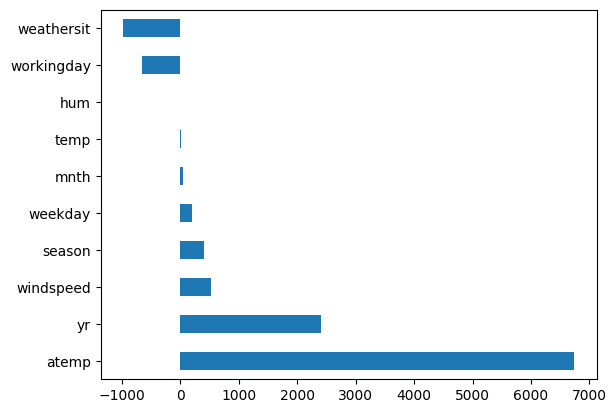

In [15]:
optimizer.plot_feature_importance()

2024-02-16 14:01:48,346 [model_optimization] [INFO] - Processed data loaded from /home/davidrmn/Studies/introduction-data-science/data/BikeRentalDaily_train.csv.
2024-02-16 14:01:48,347 [model_optimization] [INFO] - Running learning_curve
2024-02-16 14:01:48,348 [model_optimization] [INFO] - Plotting learning curve for linear_regression
2024-02-16 14:01:48,450 [model_optimization] [INFO] - Learning curve for linear_regression plotted successfully
2024-02-16 14:01:48,451 [model_optimization] [INFO] - Learning_curve completed successfully


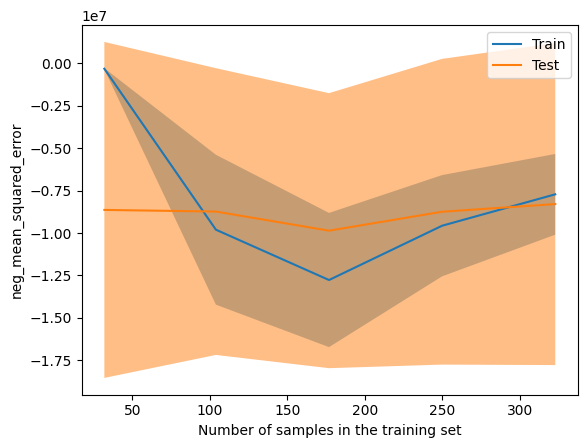

In [16]:
optimizer.learning_curve()

In [19]:
optimizer.target.analysis_results.keys()

dict_keys(['linear_regression_r2', 'linear_regression_adjusted_r2', 'linear_regression_mae', 'linear_regression_prediction', 'linear_regression_residuals', 'linear_regression_residuals_plot', 'linear_regression_feature_importance', 'linear_regression_learning_curve'])